In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bt_data = pd.read_csv('data/bt_data.csv',parse_dates=True, index_col=0, engine='python')
bt_data

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1.0,1.0,1.0,1.0
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2.0,2.0,3.0,3.0
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1.0,1.0,1.0,1.0
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1.0,1.0,1.0,1.0
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
3187,Just a warning about BT Infinity the BT Hub b...,Wales,2017-08-26,1.0,1.0,3.0,1.0
3188,I have had a contract with BT for telephone b...,Wimbledon,2017-08-26,1.0,1.0,1.0,1.0
3189,Little satisfaction from BT sales/help; poor s...,Norton Bavant,2017-08-26,1.0,1.0,1.0,2.0
3190,Just don't do it. New build took 11 weeks for...,Milton Keynes,2017-08-25,1.0,1.0,5.0,3.0


### Checking datatype of all columns in our data frame. 

In [3]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   content           3189 non-null   object 
 1   location          3134 non-null   object 
 2   date              3192 non-null   object 
 3   satisfaction      2832 non-null   float64
 4   customer_service  2796 non-null   float64
 5   speed             2773 non-null   float64
 6   reliability       2761 non-null   float64
dtypes: float64(4), object(3)
memory usage: 199.5+ KB


### Converting dtype of date column to datetime

In [4]:
# converting dtype of date column from object to datetime
bt_data['date'] = pd.to_datetime(bt_data['date'])
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   content           3189 non-null   object        
 1   location          3134 non-null   object        
 2   date              3192 non-null   datetime64[ns]
 3   satisfaction      2832 non-null   float64       
 4   customer_service  2796 non-null   float64       
 5   speed             2773 non-null   float64       
 6   reliability       2761 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 199.5+ KB


In [5]:
bt_data.head()

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1.0,1.0,1.0,1.0
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2.0,2.0,3.0,3.0
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1.0,1.0,1.0,1.0
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1.0,1.0,1.0,1.0
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1.0,1.0,1.0,1.0


##  Analysing review count

### Function to group the column (date) and return count (reviews)

In [6]:
def count_reviews(df, group):
    review_count = df.groupby(df['date'].dt.strftime(group))['content'].count()
    review_count = review_count.reset_index(level=['date'])
    return review_count

### count of reviews by year

In [7]:
review_count_year = count_reviews(bt_data, group='%Y')
review_count_year

,date,content
0,2009,100
1,2010,29
2,2011,20
3,2012,8
4,2013,21
5,2014,269
6,2015,526
7,2016,702
8,2017,572
9,2018,475


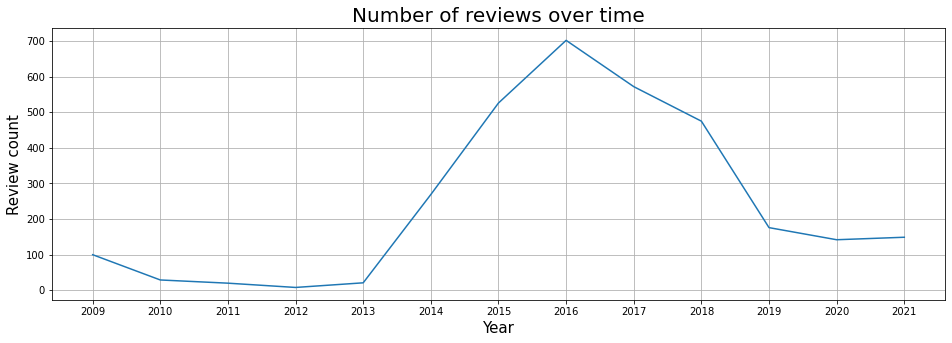

In [8]:
def plot_review_count_year(x, y, plot_title, x_label, y_label):
    plt.figure(figsize=(16,5))
    plt.plot(x, y)

    plt.xlabel(x_label, size=15)
    plt.ylabel(y_label, size=15)
    plt.title(plot_title, size=20)
    
    plt.grid()
    plt.show()

plot_review_count_year(x=review_count_year['date'], 
                   y=review_count_year['content'], 
                   plot_title = 'Number of reviews over time',
                  x_label = 'Year',
                  y_label = 'Review count')

<div class="alert alert-block alert-info">
The surge in reviews in the year 2016 can be accounted to the fact that BT had completed acquisition of EE (Everything Everywhere - mobile network provider) thereby driving up its customer base.
</div>

### count of reviews by month (cummulative of all years)

In [9]:
# function to sort months
def sort_months(df, col, sort_by):
    month = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
    df[col] = pd.Categorical(df[col], categories=month, ordered=True)
    df.sort_values(by=sort_by,inplace=True)
    return df

In [10]:
# Review count by month
review_count_month = count_reviews(bt_data, group='%B')
review_count_month = sort_months(review_count_month, col='date', sort_by='date')
review_count_month

,date,content
4,January,235
3,February,242
7,March,249
0,April,237
8,May,257
6,June,252
5,July,293
1,August,320
11,September,269
10,October,314


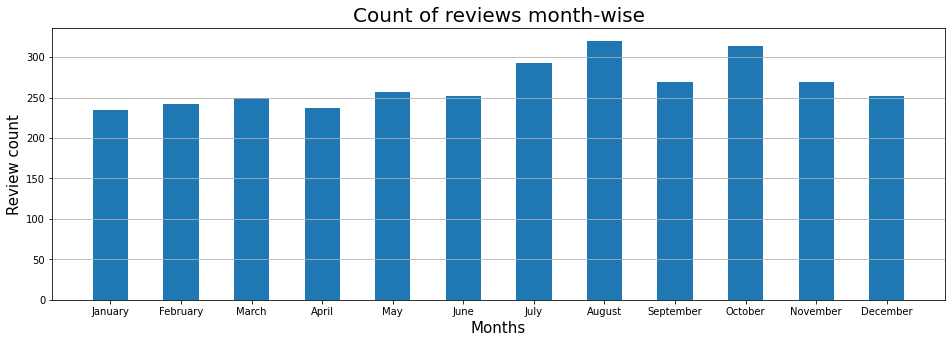

In [11]:
def plot_review_count_months(x, y, plot_title, x_label, y_label):
    plt.figure(figsize=(16,5))

    plt.bar(x,y, width=0.5)
    plt.grid(axis='y')

    plt.xlabel(x_label, size=15)
    plt.ylabel(y_label, size=15)
    plt.title(plot_title, size=20)
    plt.show()

plot_review_count_months(x=review_count_month['date'], 
                   y=review_count_month['content'], 
                   plot_title = 'Count of reviews month-wise',
                  x_label = 'Months',
                  y_label = 'Review count')

<div class="alert alert-block alert-info">
Reviews accross months doesn't seem to vary much as the range is 230-320 number of reviews every month.
</div>

### count of reviews by year and month

In [12]:
review_count_year_month = count_reviews(bt_data, group='%Y-%B')
review_count_year_month['date'] = pd.to_datetime(review_count_year_month['date'])

# splitting date column to year and month
review_count_year_month['year'] = review_count_year_month['date'].dt.year
review_count_year_month['month'] = review_count_year_month['date'].dt.month

# Replacing month number with months in strings
review_count_year_month['month'] = review_count_year_month['date'].dt.strftime('%B')


# Sorting by year and month
review_count_year_month = sort_months(df=review_count_year_month, col='month', sort_by=['year','month'])

review_count_year_month = review_count_year_month.groupby(['year', 'month']).sum().unstack('month')
review_count_year_month

content                                                              \
month January February March April May June July August September October   
year                                                                        
2009        0        0     0     0   0    0   17     28        17      15   
2010        5        0     1     5   2    5    2      2         3       4   
2011        1        1     2     4   4    3    2      1         0       1   
2012        1        0     0     1   1    1    1      1         1       1   
2013        1        2     0     0   1    1    1      4         0       0   
2014       16       12    12    15  20   15   19     23        21      31   
2015       31       40    35    33  41   55   46     54        47      59   
2016       48       57    51    55  51   32   75     59        69      99   
2017       48       49    56    48  59   46   49     59        45      35   
2018       38       41    50    35  36   51   43     47        39      33   
2019       28       14    18    18  11   19   11     11         8      14   
2020       11       13    10     8  18    9   13     18         3      11   
2021        7       13    14    15  13   15   14     13        16      11   

                         
month November December  
year                     
2009        13       10  
2010         0        0  
2011         1        0  
2012         0        0  
2013         2        9  
2014        48       37  
2015        43       42  
2016        49       57  
2017        39       39  
2018        29       33  
2019        16        8  
2020        11       17  
2021        18        0

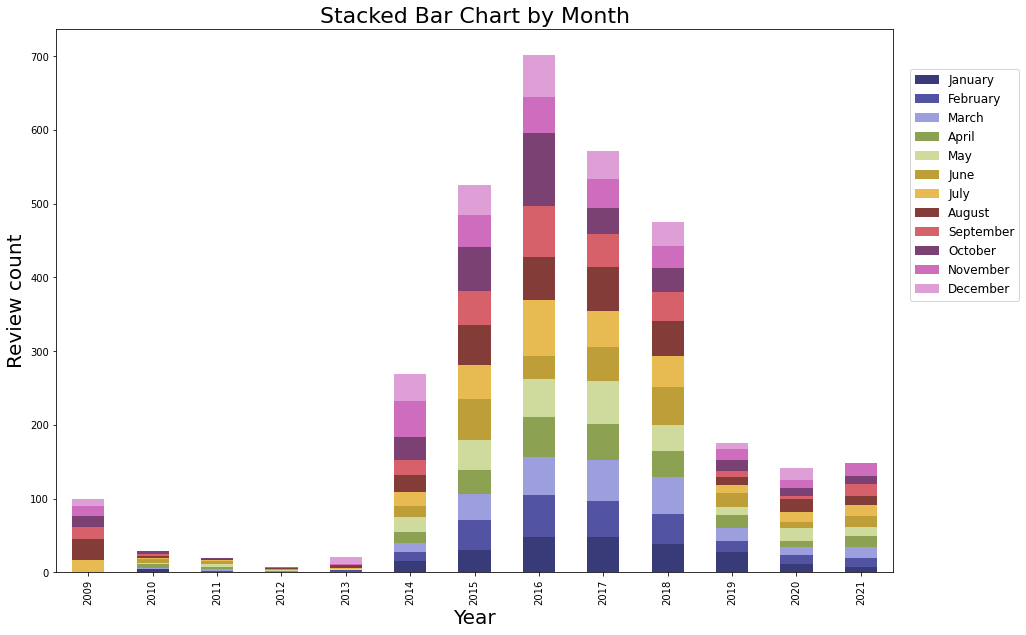

In [18]:
# Function to plot stacked bar chart

def plot_stacked_bar(df, plot_title, x_label, y_label):
    ax = df.plot(figsize=[15,10], kind='bar', stacked='True', colormap='tab20b')

    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label,fontsize=20)
    ax.set_title(plot_title,fontsize=22)
    ax.legend(df.columns.get_level_values(1), loc=[1.02,0.5], fontsize=12)
    plt.show()
    
plot_stacked_bar(df=review_count_year_month,
                plot_title='Stacked Bar Chart by Month',
                x_label='Year',
                y_label='Review count')